In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error
import seaborn as sns

In [3]:
data=pd.read_csv("car data.csv")

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

Label Encoding

In [9]:
label=LabelEncoder()
data['Fuel_Type']=label.fit_transform(data['Fuel_Type'])
data['Selling_type']=label.fit_transform(data['Selling_type'])
data['Transmission']=label.fit_transform(data['Transmission'])

In [10]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [12]:
data.shape

(301, 9)

In [11]:
data['Fuel_Type'].value_counts()

Fuel_Type
2    239
1     60
0      2
Name: count, dtype: int64

In [20]:
features=data.drop(columns=['Selling_Price','Car_Name'])
target=data['Selling_Price']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [21]:
model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features_train, target_train)
predictions=model.predict(features_test)

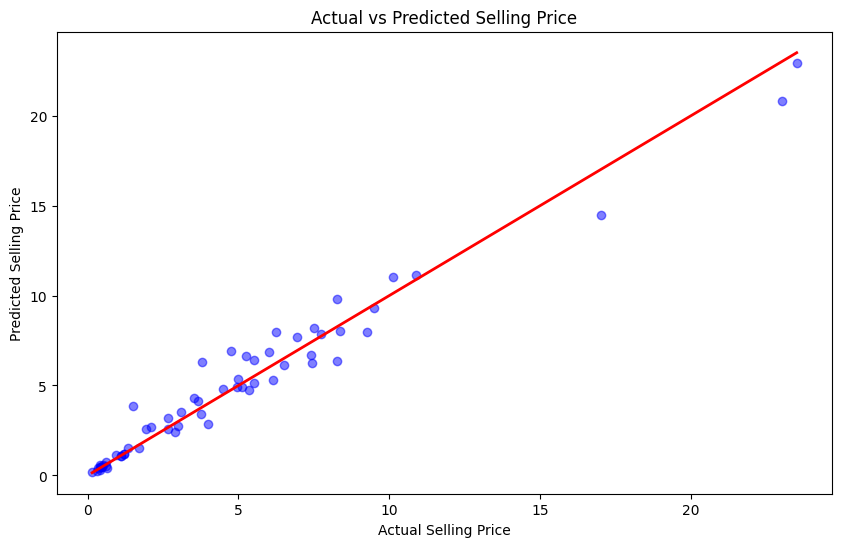

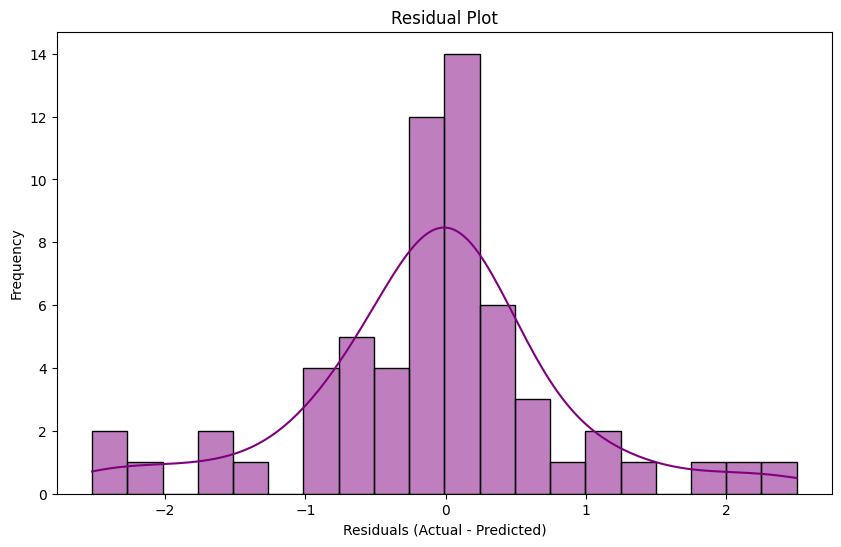

In [37]:


# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(target_test, predictions, color='blue', alpha=0.5)
plt.plot([min(target_test), max(target_test)], [min(target_test), max(target_test)], color='red', linewidth=2)  # Ideal line
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

# Residual Plot
residuals = target_test - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=20)
plt.title('Residual Plot')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


In [30]:
mean2=mean_absolute_error(target_test, predictions)
mean2

0.6171081967213115

In [33]:
# Create baseline predictions (predict the mean of the target variable)
baseline_prediction = np.full_like(target_test, target_train.mean(), dtype=float)

# Calculate MAE for the baseline model
baseline_mae = mean_absolute_error(target_test, baseline_prediction)
baseline_mae

3.38583674863388

In [35]:
model2=LinearRegression()
model2.fit(features_train, target_train)
predictions2=model2.predict(features_test)
mean2=mean_absolute_error(target_test, predictions2)

In [36]:
mean2


1.2219323621755538

SO FROM THESE TWO MODELS COMPARING MEAN ABSOLUTE ERROR OF EACH OF THEM 
WE CAN CONCLUDE THAT RANDOMFORESTREGRESSOR BEHAVES BETTER THAN LINEAR REGRESSION